In [10]:
# imports
import torch
import utils
import my_models
import hyperparameters as h # this prints GPU enabled = True
import numpy as np
import matplotlib.pyplot as plt

files = ['sample-music.txt', 'input.txt']
# load the inputs as a list of ints
inputs, char2int_cypher, int2char_cypher = utils.load_music(files[1], use_custom=True)
# full input.txt is 501470 in length
dict_size = len(char2int_cypher) # conversion is the dict convert char to int

h.char2int_cypher = char2int_cypher
h.int2char_cypher = int2char_cypher


# define test and validation set
split = int(len(inputs) * 0.1) # change 0.1 to how big we want validation set to be
validation_set = inputs[:split]
training_set = inputs[split:]


# create model
lstm = my_models.lstm_char_rnn(dict_size, h.hidden_size, h.num_hidden_layers, batch_size=h.batch_size, dropout_prob = 0.1)
init_hidden = lstm.initialize_hidden()
if h.GPU:
    init_hidden = init_hidden.cuda()
    lstm.cuda()

optimizer_lstm = torch.optim.Adam(lstm.parameters(), lr=0.01)
#optimizer_lstm = torch.optim.Adagrad(lstm.parameters(), lr=0.01)
#optimizer_lstm = torch.optim.RMSprop(lstm.parameters(), lr=0.01)

Using custom starts and ends...
There are 95 unique characters in this dataset




Epoch 0/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	2.4946417524056

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	2.0089065631230674


Epoch 1/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.6932799450375817

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	1.7877060837215848


Epoch 2/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.5053089531985195

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	1.748110055923462


Epoch 3/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.4231604608622463

Working on sequence 0-10000
finished validation with this epoch!
validation Loss:	1.7325644228193495


Epoch 4/299
----------
Working on sequence 0-10000
finished training with this epoch!
training Loss:	1.3760

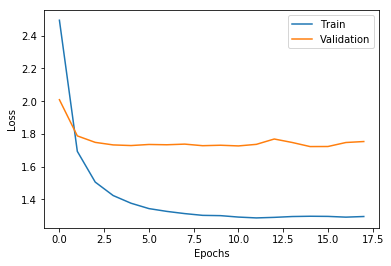

In [11]:
best_state, last_state = my_models.train(lstm, optimizer_lstm, h.epochs, training_set,
                       validation_set, h.sequence_length, init_hidden, force_epochs=False)


In [12]:
predicted_chars, hidden_activations = my_models.generate(last_state, lstm, h.temperature, h.prediction_length)

final output =  $
L:
T:Bhais MollagDhe
R:Polka
D:Joceananwing Lavh!UBcAF|G2A B2c|ded Bcd|"G"ddB ""G"G2e|d"G"G"G2A GFG|"Dm"FAc dBA|"G"z3"G"B""G"G2A:|
|:GDE|"D"B2d|"B\b"d2e agf:|
[1 gbe age|afd cee|dcd e2g|fdB dAF||
;
$
X:60
T:Pittranserny's
R:reel
Z:id:hn-polka-1
M:C|
L:1/8
K:D
e>e c2 | +breath+d d2 :| D2>Bz | fz | c3 GEG | D2G B>d | d2 d2 | B2 cB AB | (cd/c/) B/c/d/ Bc | d6f> gf | e2 c/2d/2B/2A/2 dc/B/ | e>d cf|Ad Bdc>B|
c2 eec>c de|Be fe|de dB cd | \
e2 d2 | e2 d2 | d3f ec | cz ed cB | A4 z2 | Az (B/A) | Az d>d|dB AG F2|]ecBc Aa|g2 e>d|c3- !D2:|
egf g2g| f3 geg|a3 A2c|d2e f3|"R\[R:3/4
Q:1/4=1206
K:Bm
P:A
A>B 


In [ ]:
special_chars = {'\n':'nl', ' ':'sp'}

# this relies on prediction_length = 600
for i in hidden_activations.T: 
    data = i.reshape(30,20)

  
    heatmap = plt.pcolor(data,cmap='bwr')

    
    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            predicted_char = predicted_chars[y*20+x]
            if predicted_char in special_chars: 
                predicted_char = special_chars[predicted_char]

            plt.text(x + 0.5, y + 0.5, predicted_char,
                horizontalalignment='center',
                verticalalignment='center',)
    plt.colorbar(heatmap)

    plt.show()